In [60]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
heart_df = pd.read_csv("/Users/suyogpawar/Documents/Suyog/PythonNotebooks/DSBDA Lab Datasets/heart.csv")
air_df = pd.read_csv("/Users/suyogpawar/Documents/Suyog/PythonNotebooks/DSBDA Lab Datasets/India Air Quality Data.csv",
                     low_memory=False, encoding="ISO-8859-1")

In [3]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
air_df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
air_df.drop(["stn_code","sampling_date","location_monitoring_station","agency"], axis=1, inplace=True)
air_df

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,NaN,2015-12-24
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,NaN,NaN,2015-12-29
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
air_df.isnull().sum()/air_df.shape[0]

state       0.000000
location    0.000007
type        0.012377
so2         0.079510
no2         0.037254
rspm        0.092307
spm         0.544788
pm2_5       0.978625
date        0.000016
dtype: float64

In [7]:
air_df.drop(["pm2_5", "spm"], axis=1, inplace=True)
air_df

,state,location,type,so2,no2,rspm,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,1990-03-01
...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,2015-12-24
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,2015-12-29
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
air_df.dropna(subset=["location", "type", "date"], inplace=True)
air_df

,state,location,type,so2,no2,rspm,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,1990-03-01
...,...,...,...,...,...,...,...
435734,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.0,2015-12-15
435735,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.0,2015-12-18
435736,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.0,2015-12-21
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,2015-12-24


In [9]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
air_df[["so2", "no2", "rspm"]] = imputer.fit_transform(air_df[["so2", "no2", "rspm"]])
air_df

,state,location,type,so2,no2,rspm,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.888428,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,108.888428,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.888428,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.888428,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,108.888428,1990-03-01
...,...,...,...,...,...,...,...
435734,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.000000,2015-12-15
435735,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.000000,2015-12-18
435736,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.000000,2015-12-21
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.000000,2015-12-24


In [10]:
air_df.isnull().sum()/air_df.shape[0]

state       0.0
location    0.0
type        0.0
so2         0.0
no2         0.0
rspm        0.0
date        0.0
dtype: float64

In [18]:
air_df[air_df.duplicated(keep=False)]

,state,location,type,so2,no2,rspm,date


In [17]:
air_df.drop_duplicates(inplace=True)
air_df

,state,location,type,so2,no2,rspm,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.888428,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,108.888428,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.888428,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.888428,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,108.888428,1990-03-01
...,...,...,...,...,...,...,...
435734,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.000000,2015-12-15
435735,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.000000,2015-12-18
435736,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.000000,2015-12-21
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.000000,2015-12-24


In [19]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
heart_df.duplicated().sum()

723

In [22]:
heart_df.drop_duplicates(inplace=True)
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [28]:
merged_df = pd.concat([air_df, heart_df])
merged_df

,state,location,type,so2,no2,rspm,date,age,sex,cp,...,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.888428,1990-02-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,108.888428,1990-02-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.888428,1990-02-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.888428,1990-03-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,108.888428,1990-03-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,0.0,2.0,...,211.0,0.0,0.0,115.0,0.0,1.5,1.0,0.0,2.0,1.0
733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,0.0,2.0,...,141.0,0.0,1.0,175.0,0.0,0.6,1.0,0.0,2.0,1.0
739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,1.0,0.0,...,255.0,0.0,1.0,161.0,1.0,0.0,2.0,1.0,3.0,0.0
843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,1.0,3.0,...,273.0,0.0,0.0,125.0,0.0,0.0,2.0,0.0,2.0,0.0


In [33]:
labelEncoder = LabelEncoder()
for column in ["state", "location", "type"]:
    air_df[column] = labelEncoder.fit_transform(air_df[column])
air_df

,state,location,type,so2,no2,rspm,date
0,0,113,6,4.8,17.4,108.888428,1990-02-01
1,0,113,1,3.1,7.0,108.888428,1990-02-01
2,0,113,6,6.2,28.5,108.888428,1990-02-01
3,0,113,6,6.3,14.7,108.888428,1990-03-01
4,0,113,1,4.7,7.5,108.888428,1990-03-01
...,...,...,...,...,...,...,...
435734,33,277,3,20.0,44.0,148.000000,2015-12-15
435735,33,277,3,17.0,44.0,131.000000,2015-12-18
435736,33,277,3,18.0,45.0,140.000000,2015-12-21
435737,33,277,3,22.0,50.0,143.000000,2015-12-24


In [43]:
negative_values_count = 0
for column in ["so2", "no2", "rspm"]:
    negative_values_count += (air_df[column] < 0).sum()
negative_values_count

0

In [44]:
X = heart_df.drop("target", axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2


In [45]:
Y = heart_df["target"]
Y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

In [48]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
353,57,1,0,110,201,0,1,126,1,1.5,1,0,1
260,44,1,2,120,226,0,1,169,0,0.0,2,0,2
287,71,0,1,160,302,0,1,162,0,0.4,2,2,2
163,48,1,0,124,274,0,0,166,0,0.5,1,0,3
20,60,1,2,140,185,0,0,155,0,3.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,52,1,0,128,204,1,1,156,1,1.0,1,0,0
384,35,1,0,126,282,0,0,156,1,0.0,2,0,3
691,55,0,1,135,250,0,0,161,0,1.4,1,0,2
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3


In [49]:
Y_train

353    1
260    1
287    1
163    0
20     0
      ..
14     0
384    0
691    1
878    0
71     0
Name: target, Length: 241, dtype: int64

In [55]:
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
Y_pred

/Users/suyogpawar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [59]:
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77        21
           1       0.89      0.85      0.87        40

    accuracy                           0.84        61
   macro avg       0.82      0.83      0.82        61
weighted avg       0.84      0.84      0.84        61



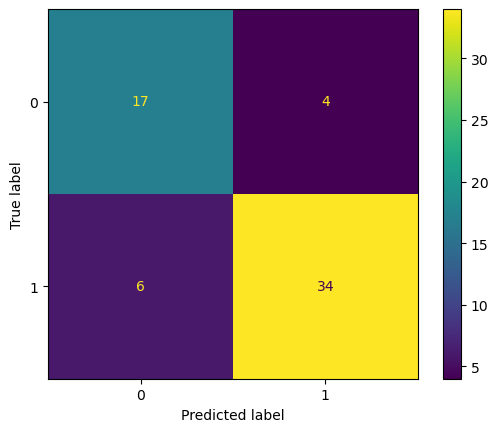

In [61]:
conf_matrix = confusion_matrix(Y_pred, Y_test)
conf_matrix_dis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
conf_matrix_dis.plot()